<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_ScalingPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view of the property was
* Condition: An index from 1 to 5 on the condition of the apartment
* Grade: An index from 1 to 13, where 1-3 falls short of the building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design
* Sqft_above: The square footage of the interior housing space that is above ground level.
* Sqft_basement: The square footage of the interior housing space that is below ground level.
* Yr_built: The year the house was initially built
* Yr_renovated: The year of the house's last renovation
* Zipcode: What zipcode area the house is in
* Lat: Lattitude
* Long: Longitude
* Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.
* Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

### Step 1: Read and work on `kc_house_data.csv`
- Read the dataset using `pd.read_csv`
- Print the columns of the dataset
- Print the info about the dataset
- Print the description of the dataset features

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Datasets/kc_house_data.csv')

In [41]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Datasets/kc_house_data.csv', index_col=0)

In [43]:
data = data.reset_index()

In [44]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [47]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Step 2: Split the dataset into training and test sets
- Split the dataset, use `random_state=1`
- Check the shape of the train dataset and target set
- Create a scatter plot for the features vs price
- Create a box-plot for the features

In [48]:
import numpy as np
data.isin([np.nan, np.inf, -np.inf]).any(0)

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [49]:
data[data.isin([np.nan, np.inf, -np.inf]).any(1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,20140529T000000,485000.0,4,1.0,1600,4300,1.5,0,0,...,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


In [50]:
data=data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [51]:
data.shape

(21611, 21)

In [52]:
y = data.price
X = data.drop(['date', 'price', 'zipcode','id'], axis=1)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [55]:
X_train.shape

(16208, 17)

In [56]:
X_train.bathrooms.quantile(q=0.99)

4.25

In [57]:
len(X_train.columns)

17

In [58]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

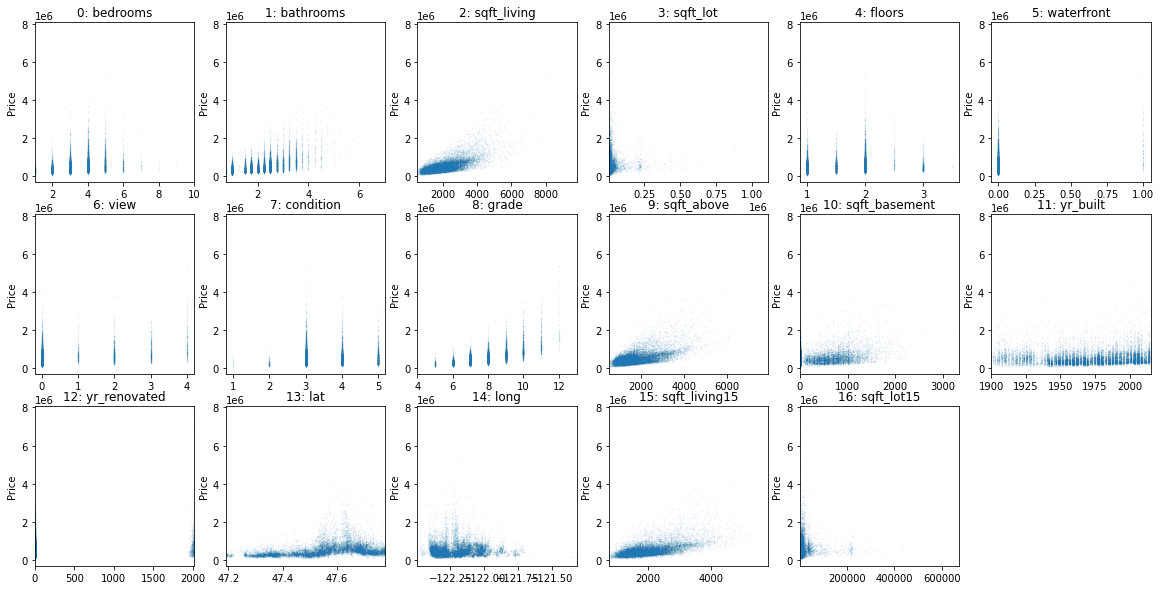

In [59]:
import  matplotlib.pyplot as plt
fig,axes = plt.subplots(3,6, figsize=(20,10))

for i, ax in enumerate(axes.ravel()):
    if i>16:
        ax.set_visible(False)
        continue
    X_col=X_train.iloc[:,i]
    if X_col.nunique()>10:
        ax.set_xlim(X_col.quantile(q=0.001), X_col.quantile(q=0.9999))
    ax.scatter(X_col, y_train, alpha=.1, s=.1)
    ax.set_title("{}: {}".format(i, X_train.columns[i]))
    ax.set_ylabel("Price")


In [60]:
axes.ravel()

array([<Axes: title={'center': '0: bedrooms'}, ylabel='Price'>,
       <Axes: title={'center': '1: bathrooms'}, ylabel='Price'>,
       <Axes: title={'center': '2: sqft_living'}, ylabel='Price'>,
       <Axes: title={'center': '3: sqft_lot'}, ylabel='Price'>,
       <Axes: title={'center': '4: floors'}, ylabel='Price'>,
       <Axes: title={'center': '5: waterfront'}, ylabel='Price'>,
       <Axes: title={'center': '6: view'}, ylabel='Price'>,
       <Axes: title={'center': '7: condition'}, ylabel='Price'>,
       <Axes: title={'center': '8: grade'}, ylabel='Price'>,
       <Axes: title={'center': '9: sqft_above'}, ylabel='Price'>,
       <Axes: title={'center': '10: sqft_basement'}, ylabel='Price'>,
       <Axes: title={'center': '11: yr_built'}, ylabel='Price'>,
       <Axes: title={'center': '12: yr_renovated'}, ylabel='Price'>,
       <Axes: title={'center': '13: lat'}, ylabel='Price'>,
       <Axes: title={'center': '14: long'}, ylabel='Price'>,
       <Axes: title={'center': '15:

<Axes: >

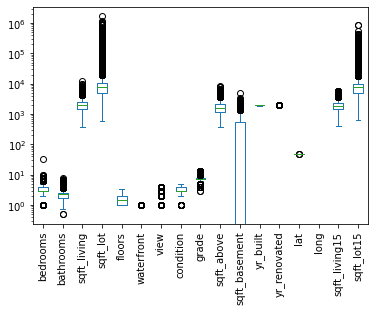

In [61]:
X_train.plot(kind='box', logy=True, rot=90)

### Step 3: Imputing
- Check the number of missing values for the columns
- Remove rows from df that contain missing values
- Remove columns from df that contain missing values
- Only drop rows where all columns are NaN
- Drop rows that have less than 3 real values
- Only drop rows where NaN appear in specific columns (here `floors`)
- Implement simpleimputer using the strategy of `mean`

In [62]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"name": ['Superman', 'Batman', 'Spiderman'],
                   "toy": [np.nan, 'Batmobile', 'Spiderman toy'],
                   "born": [pd.NaT, pd.Timestamp("1956-06-26"),
                            pd.NaT]})
df

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [63]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [64]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [65]:
df.dropna(axis=1)

,name
0,Superman
1,Batman
2,Spiderman


In [66]:
df

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [67]:
df.dropna(how='all')

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [68]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [69]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [74]:
from sklearn.impute import SimpleImputer

myimputer=SimpleImputer(missing_values=np.nan, strategy='mean')

In [75]:
myimputer.fit(X_train)

SimpleImputer()

In [76]:
X_train_imp=myimputer.transform(X_train)

In [77]:
X_test_imp = myimputer.transform(X_test)

### Step 4: Scaling
- Scale the train dataset using `StandarScaler`
- Fit the `RidgeCV()` with cross validation (cv=10) to the training dataset. Import `RidgeCV` from `sklearn.linear_model`
- Check the mean and standard deviation of the scores.
- Repeat cross validation for scaled dataset. Do you see any difference?

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
scaler.fit(X_train_imp)

StandardScaler()

In [80]:
X_train_scaled = scaler.transform(X_train_imp)  ##scaler.fit_transform(X_train_imp)

In [81]:
X_test_scaled = scaler.transform(X_test_imp)   ##

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

LinearRegression-->try to find the coefficients (weights) for each variable such that 
when I multiply the coefficents with correspodning variables,
I would get a good prediction of the target

Pricehat = W1*SqtLot + W2*NumBedrooms + W3*View+ ...
Price-Pricehat will be minimized

Ridge is a LinearRegression with enforcing that w's caanot take reealy large or small values

In [83]:
scores = cross_val_score(Ridge(), X_train, y_train, cv=10)

In [84]:
scores

array([0.68405324, 0.70636278, 0.68552364, 0.68766798, 0.66928814,
       0.72882988, 0.6848198 , 0.6520462 , 0.70818326, 0.67398727])

In [85]:
np.mean(scores), np.std(scores)

(0.6880762212692193, 0.020694627227739366)

In [86]:
scores_scaled = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)

In [87]:
np.mean(scores_scaled), np.std(scores_scaled)

(0.688068875269335, 0.020803724261035546)

### Step 5:
Repeat Step 5 using `KNeighborsRegressor`.

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
scores_n = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores_n), np.std(scores_n)

(0.5005116299146974, 0.0360201497233314)

In [90]:
scores_ns = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores_ns), np.std(scores_ns)

(0.783362211121915, 0.025695481709514998)

# Pipelines

### Step 1: Scaling without Pipeline
- Split the dataset into train and test datasets
- Scale the train dataset
- Fit the scaled dataset with `Ridge()`
- Scale the test dataset
- Print the score for the scaled test dataset

In [91]:
imputer = SimpleImputer()
imputer.fit(X_train)
X_train_imp = imputer.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train_imp)

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.8620886258632285

In [92]:
import numpy as np
param_grid1 = {"n_neighbors":np.arange(1,10)}

In [93]:
from sklearn.model_selection import GridSearchCV
mygrid1 = GridSearchCV(KNeighborsRegressor(), param_grid1, cv=10)

In [94]:
mygrid1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [95]:
mygrid1.best_params_

{'n_neighbors': 6}

In [96]:
X_test_imp = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imp)
knn.score(X_test_scaled, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.7905484404266702

### Step 2: 
Repeat Step 1 using `make_pipeline`

In [97]:
from sklearn.pipeline import make_pipeline

mypipeline = make_pipeline(SimpleImputer(), StandardScaler(), KNeighborsRegressor())

In [98]:
mypipeline.fit(X_train, y_train)
mypipeline.score(X_train, y_train)

0.8620886258632285

In [99]:
mypipeline.score(X_test, y_test)

0.7905484404266702

In [100]:
mypipeline.steps[0]

('simpleimputer', SimpleImputer())

In [101]:
mypipeline.steps

[('simpleimputer', SimpleImputer()),
 ('standardscaler', StandardScaler()),
 ('kneighborsregressor', KNeighborsRegressor())]

### Step 3:
- Create a pipeline of `StandardScaler()`, `KNeighborsRegressor()`., You can use either `Pipeline` or `make_pipeline`
- Create a grid search for number of reigbors for `KNeighborsRegressor()`. Change the neighbors from 1 to 10.
- Fit the grid on the train dataset
- Print the test score.

In [102]:
from sklearn.pipeline import Pipeline

mypipeline2 = Pipeline((('imputer', SimpleImputer()),
 ('scaler', StandardScaler()),
 ('reg', KNeighborsRegressor())))

In [103]:
mypipeline2.steps

(('imputer', SimpleImputer()),
 ('scaler', StandardScaler()),
 ('reg', KNeighborsRegressor()))

In [104]:
import numpy as np
param_grid = {"reg__n_neighbors":np.arange(1,10)}

In [105]:
from sklearn.model_selection import GridSearchCV
mygrid = GridSearchCV(mypipeline2, param_grid, cv=10)

In [106]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=(('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('reg', KNeighborsRegressor()))),
             param_grid={'reg__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [107]:
mygrid.best_params_

{'reg__n_neighbors': 7}